In the following classe, the <em>fit()</em> method estimates the $\beta$ parameters by calculating

<center>
$\hat{\beta} = (X^TX)^{-1}X^Ty$.
</center>

The <em>predict()</em> method uses the fitted values by computing $\hat{y}' = X'\hat{\beta}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LinearRegression:
    
    def fit(self, X, y, intercept=False):
        
        if intercept == False:
            ones = np.ones(len(X)).reshape(len(X), 1)
            X = np.concatenate((ones, X), axis=1)
            
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        # parameter estimation
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        # make predictons
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        # compute loss
        self.L = .5*np.sum((self.y - self.y_hat)**2)
        
    def predict(self, X_test, intercept=False):
        
        if intercept == False:
            ones = np.ones(len(X_test)).reshape(len(X_test), 1)
            X_test = np.concatenate((ones, X_test), axis=1)
        
        self.y_test_hat = np.dot(X_test, self.beta_hats)
        

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston['data']
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train, intercept=False)

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


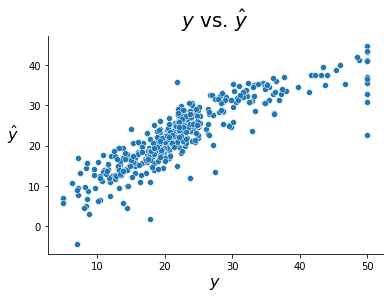

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

In [18]:
model.predict(X_test)

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


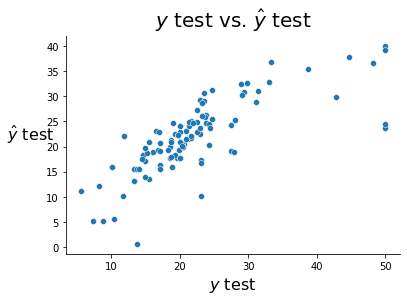

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(y_test, model.y_test_hat)
ax.set_xlabel(r'$y$ test', size = 16)
ax.set_ylabel(r'$\hat{y}$ test', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ test vs. $\hat{y}$ test', size = 20, pad = 10)
sns.despine()